In [33]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from IPython.display import set_matplotlib_formats
import glob
# %matplotlib inline
# set_matplotlib_formats('svg', 'png', 'pdf')
sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27), 'savefig.dpi':300, 'savefig.bbox':'tight'})


In [53]:
def get_section_results(file):
    steps = []
    eval_returns = []
    eval_stdRets = []
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Eval_AverageReturn':
                steps.append(e.step)
                eval_returns.append(v.simple_value)
            if v.tag == 'Eval_StdReturn':
                eval_stdRets.append(v.simple_value)
    data_np = np.vstack([steps, eval_returns, eval_stdRets]).T
    data_df = pd.DataFrame(data_np, columns=['step', 'Eval_AverageReturn', 'Eval_StdReturn'])
    return data_df

def find_file(name, path='data/'):
    if isinstance(name, list):
        files = []
        for n in name:
            files.append(glob.glob('data/'+n+'*/event*')[0])
        return files
    else:
        assert isinstance(name, str)
        return glob.glob('data/*'+name+'*/event*')

def draw(file_name):
    df = get_section_results(file_name)
    ax = sns.lineplot(x='step', y='Eval_AverageReturn', data=df)
    ax.fill_between(df["step"], y1=df["Eval_AverageReturn"] - df["Eval_StdReturn"], y2=df["Eval_AverageReturn"] + df      ["Eval_StdReturn"], alpha=.5)
    plt.xlabel('iteration')
    return ax

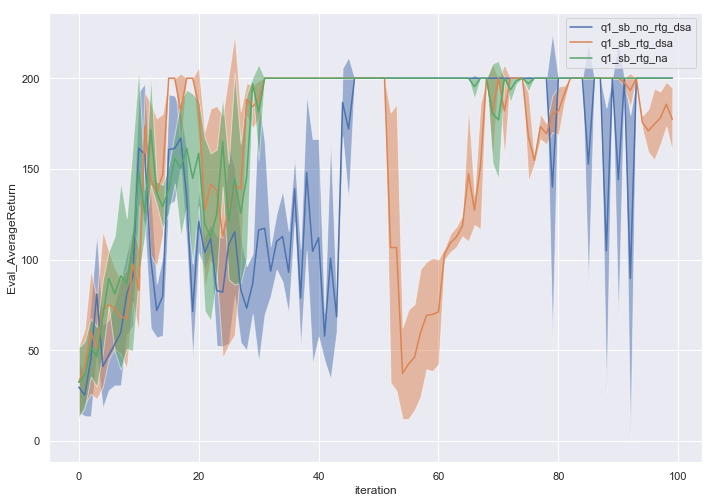

In [54]:
# Experiment 1
sb_names = ['q1_sb_no_rtg_dsa', 'q1_sb_rtg_dsa', 'q1_sb_rtg_na']
file_names = find_file(sb_names)
for file_name in file_names:
    ax = draw(file_name)
ax.legend(sb_names)
ax.figure.savefig('../../hw2_submission/exp1.1.png')

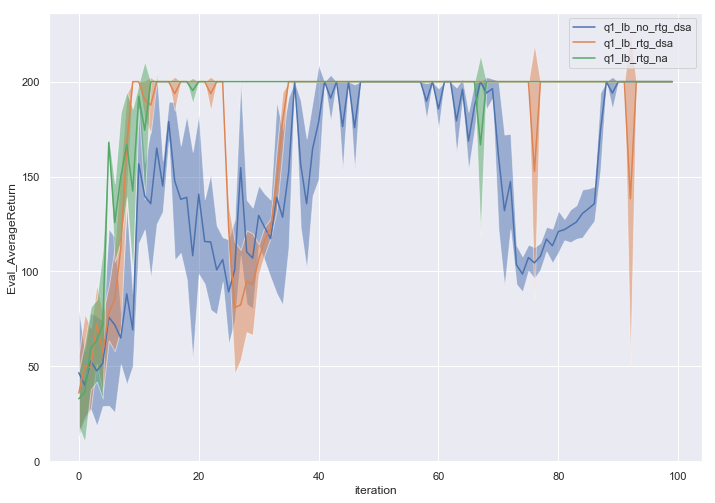

In [55]:
lb_names = ['q1_lb_no_rtg_dsa', 'q1_lb_rtg_dsa', 'q1_lb_rtg_na']
file_names = find_file(lb_names)
for file_name in file_names:
    ax = draw(file_name)
ax.legend(lb_names)
ax.figure.savefig('../../hw2_submission/exp1.2.png')

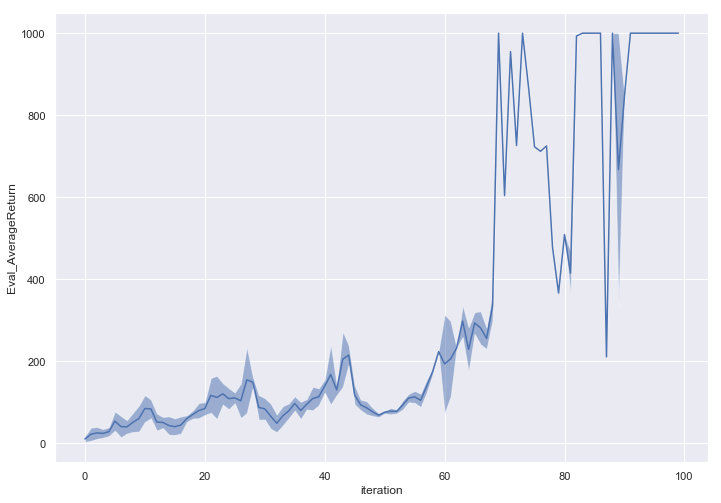

In [56]:
# Experiment 2
file_names = find_file('q2_b500_r0.01')[0]
ax = draw(file_names)
plt.savefig('../../hw2_submission/exp2.png')

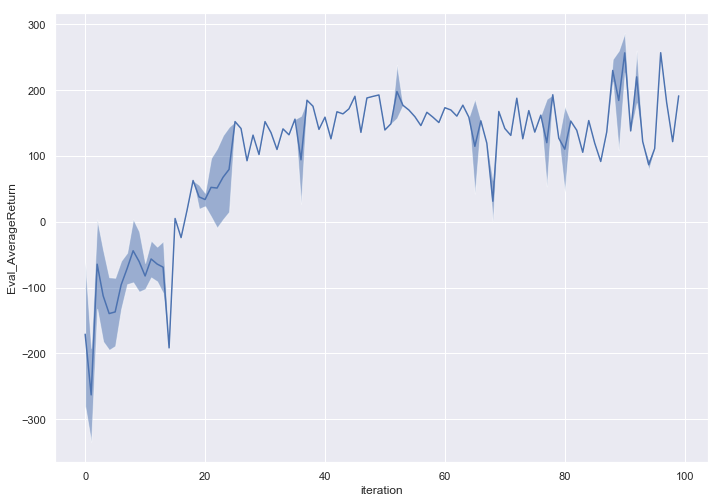

In [57]:
# Experiment 3
file_names = find_file('q3_b40000_r0.005_LunarLanderContinuous-v2_21-09-2020_11-16-20')[0]
ax = draw(file_names)
ax.figure.savefig('../../hw2_submission/exp3.png')

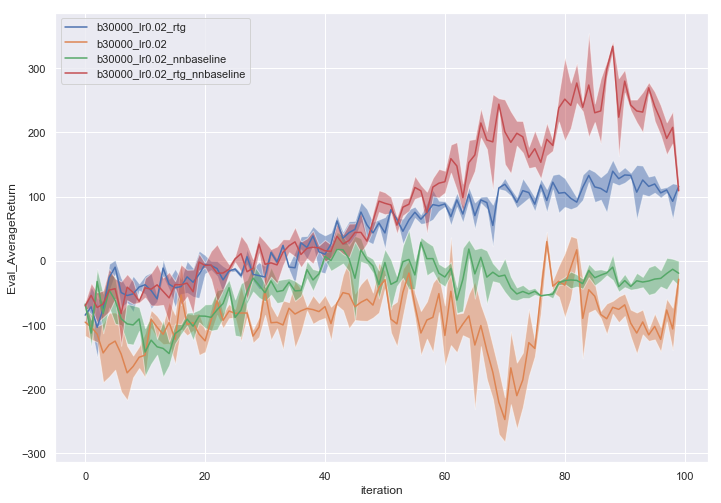

In [58]:
# Experiment 4
file_names = find_file('q4_b30000_lr0.02')
for file_name in file_names:
    ax = draw(file_name)
names = [file_name.split('q4_')[1].split('_Half')[0] for file_name in file_names]
ax.legend(names)
ax.figure.savefig('../../hw2_submission/exp4.2.png')

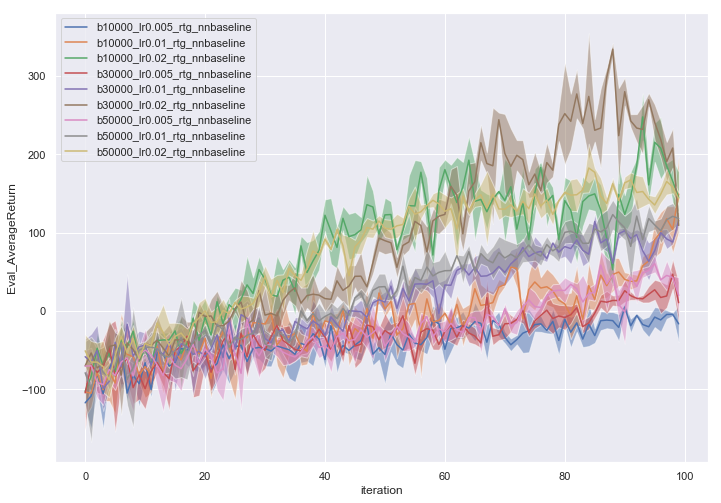

In [59]:
file_names = find_file('q4_search')
file_names.sort()
for file_name in file_names:
    ax = draw(file_name)
names = [file_name.split('search_')[1].split('_Half')[0] for file_name in file_names]
ax.legend(names)
ax.figure.savefig('../../hw2_submission/exp4.1.png')